### Mario Soto

## Objective

### Practice the searching for optimal tuning parameters


### You will practice:
- How can K-fold cross-validation be used to search for an optimal tuning parameter?
- How can this process be made more efficient?
- How do you search for multiple tuning parameters at once?
- What do you do with those tuning parameters before making real predictions?
- How can the computational expense of this process be reduced?

### First, import the required libraries

In [155]:
"""
Import:
- pandas
- sklearn Train-Test split
- sklearn Standard Scaler
- sklearn K Neighbors Classifier
- sklearn Cross val score
- sklearn Grid Search Cross Validation
- matplotlib
"""
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Keep the following lines (you can comment them out to see what happens)
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")



### Read the data. For this exercise we are using the 'winequality-white.csv' file

Note: The path in your drive might change

In [156]:
from google.colab import drive
drive.mount('/content/drive')
# Read the content in a df DataFrame using Pandas. Be careful with the separators
df = pd.read_csv('/content/drive/My Drive/winequality-white.csv', sep=';')
# show the first 5 instances
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [157]:
# Show the number of rows and columns
print(df.shape)


(4898, 12)


In [158]:
# Show the description of the DataFrame
df.describe()

# Check for missing values
# df.isnull().sum()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate our X and y. y is our column 'quality'

In [159]:
# Get X and y
X = df.drop('quality', axis=1)
y = df['quality']

In [160]:
# Show the first 5 elements of X
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [161]:
# Show the first 5 elements of y
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

### Split train and test

In [162]:
# Get X_train, X_test, y_train, and y_test.
# Use a 80-20 split, with random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# Show the sizes for your datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


### Do you think we need to Standardize X?

In [164]:
# Standardize your X_train using a StadardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [165]:
# Show the 5 rows of the scaled dataset
print(X_train_scaled[:5])

[[ 5.15119310e-01 -1.07623315e+00  2.27730764e-01  3.40419470e-01
  -8.13688488e-01  5.34064605e-01 -6.41932319e-01 -4.47040725e-01
  -3.28261014e-01 -7.02444738e-01  1.54037099e+00]
 [-6.69188091e-01 -2.88776731e-01  8.95831948e-01  1.00207124e+00
  -2.17211567e-01  7.73947112e-01  1.35510550e+00  9.03369755e-01
  -6.18856911e-02  2.66074147e-01 -8.21711966e-01]
 [-1.49820327e+00  4.00247639e-01 -2.28071805e-02  1.84736700e-01
  -4.00742927e-01 -6.05377303e-01 -1.02232048e+00 -4.60280044e-01
   4.04271124e-01  1.93263316e-03  4.81506217e-01]
 [ 4.13963498e-02 -8.79369048e-01  1.44218115e-01 -9.24503038e-01
  -4.46625767e-01 -1.25612289e-01 -8.79674917e-01 -3.04718052e-01
   1.37895801e-01  4.42168490e-01  2.37152807e-01]
 [ 9.88842271e-01  2.03383533e-01 -6.07395717e-01  2.43240669e+00
   3.33382515e-01  5.42995912e-02  8.55846045e-01  1.88307932e+00
   7.13019704e-02  8.99798045e-02 -8.86517384e-02]]


### Create a KNN classifier considering just 5 neighbors

In [166]:
# Define a K Neighbors Classifier with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

### To train our model, we will use cross-validation using 5 folds for accuracy

In [167]:
# use the cross_val_score() method to train our knn classifier with X_train and y_train
#, and 5 folds. Use accuracy as metric.
# Save the result in a variable scores
scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [168]:
# print the scores obtained
scores

array([0.55357143, 0.54591837, 0.5497449 , 0.53128991, 0.54916986])

In [169]:
# get the average accuracy as an estimate of out-of-sample accuracy
scores.mean()

0.5459388927984987

#### This is the accuracy of our model using 5 neighbors! Can we improve it?

### Let's now search for the optimal value of neighgbors (k)

### Let's use a more efficient parameter tuning using `GridSearchCV`

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [170]:
# define the parameter values that should be searched
# We are going to use the same range, from 1 to 31 (inclusive)
# Define a variable to store a list with the range values
param_range = list(range(1, 32))

In [171]:
# Show the list of values
print("List of parameter values:", param_range)

List of parameter values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


### Let's create a parameter grid. In other words, let's map the the parameter names to the values that should be searched


In [172]:
# Define a variable to store the dictionary of parameters
# The parameter is the number of neighbors mapped to the list of
#values we obtained previously
param_grid = {'n_neighbors': param_range}
# show your dictionary of parameters
print("Dictionary of parameters:", param_grid)

Dictionary of parameters: {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}


In [173]:
# Instantiate a new KNN model WITHOUT any parameters
knn_model = KNeighborsClassifier()

### Instantiate a GridSearchCV object

In [174]:
# Use as parameters the following:
# knn model,
# the dictionary of parameters,
# the number of folds (5),
# 'accuracy' as the metric
# In addition, you can use the parameter n_jobs=-1 to run the computations in parallel (if supported by your OS)
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [175]:
# show the object created
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### Let's train the grid with our X_train and y_train data

In [176]:
# use the object to train with X_train and y_train
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### Let's view the results.

We can create a Pandas DataFrame using the output of the cv_results_ as input for our DataFrame

In [177]:
# view the results (cv_results) as a pandas DataFrame
results_subset = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
results_subset

,mean_test_score,std_test_score,params
0,0.607451,0.009383,{'n_neighbors': 1}
1,0.557168,0.006918,{'n_neighbors': 2}
2,0.545939,0.005701,{'n_neighbors': 3}
3,0.551295,0.010879,{'n_neighbors': 4}
4,0.545939,0.007717,{'n_neighbors': 5}
5,0.543390,0.004105,{'n_neighbors': 6}
6,0.550028,0.011898,{'n_neighbors': 7}
7,0.544918,0.007160,{'n_neighbors': 8}
8,0.542873,0.015039,{'n_neighbors': 9}
9,0.541602,0.008034,{'n_neighbors': 10}


In [178]:
# We can also print the array of mean scores only (mean_test_score)
# Store the results in a separate variable
mean_scores = grid_search.cv_results_['mean_test_score']

# print the variable
print(mean_scores)

[0.60745139 0.55716794 0.54593922 0.55129506 0.54593889 0.54339048
 0.55002802 0.54491783 0.54287278 0.54160151 0.54058827 0.5433908
 0.54849578 0.54900761 0.55130288 0.55334304 0.55589471 0.556661
 0.55947136 0.55998514 0.55538712 0.5528374  0.55028573 0.55130548
 0.55258132 0.55309348 0.55411486 0.55692359 0.55539363 0.55564743
 0.5497752 ]


### Let's visualize the scores

Text(0, 0.5, 'Cross-Validated Accuracy')

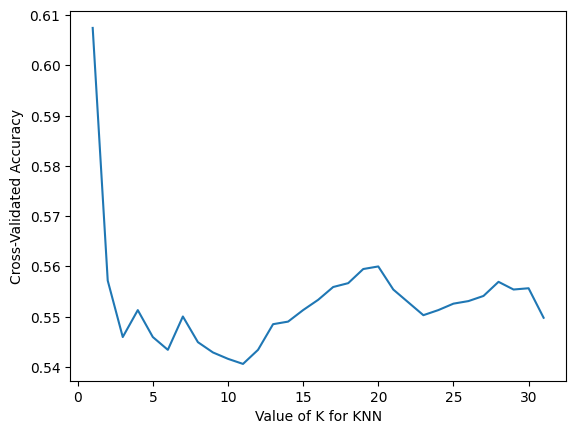

In [179]:
k_range = list(range(1, 32))
grid_mean_scores = grid_search.cv_results_['mean_test_score']

# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Finally, get the parameter for the best model

In [180]:
# Print the best score
print(grid_search.best_score_)

# Print the best parameters
print(grid_search.best_params_)

# Print the best estimator
print(grid_search.best_estimator_)


0.6074513905178931
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


### We improved our model by searching the best k for the neighbors!

### But, what would happen if our model has more parameters? Let's see how we can search the best combination of parameters

### Searching multiple parameters simultaneously


#### First, let's define the parameter values that should be searched

In [181]:
# define the parameter values that should be searched
# As before, define a list for the range of neighbors, from 1 to 31 (inclusive)
param_range_neighbors = list(range(1, 32))


# define a list for the weight options ('uniform' and 'distance')
param_weights = ['uniform', 'distance']


### Create a parameter grid. For that, we need to map the parameter names to the values that should be searched

In [182]:
# Create a dictionary mapping the parameters to a key
# You can see the parameter here:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
param_grid = {'n_neighbors': param_range_neighbors, 'weights': param_weights}


# print the content of the grid dictionary
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'weights': ['uniform', 'distance']}


### Instantiate and train the grid

In [183]:
# As before, we use a vanilla knn model, the dictionay of parameters, 5 folds, and accuracy as the score
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': param_range_neighbors, 'weights': param_weights}
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### As before, let's create a pandas dataframe to see the results

In [195]:
# view the results
results_df = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

results_df

,mean_test_score,std_test_score,params
0,0.607451,0.009383,{'n_neighbors': 1}
1,0.557168,0.006918,{'n_neighbors': 2}
2,0.545939,0.005701,{'n_neighbors': 3}
3,0.551295,0.010879,{'n_neighbors': 4}
4,0.545939,0.007717,{'n_neighbors': 5}
5,0.543390,0.004105,{'n_neighbors': 6}
6,0.550028,0.011898,{'n_neighbors': 7}
7,0.544918,0.007160,{'n_neighbors': 8}
8,0.542873,0.015039,{'n_neighbors': 9}
9,0.541602,0.008034,{'n_neighbors': 10}


### Examine the best model

In [196]:
# Print the best score
print(grid_search.best_score_)

# Print the best parameters
print(grid_search.best_params_)


0.6074513905178931
{'n_neighbors': 1}


## Wow! We have improved more our model!

### Now you can use those parameters to train a model for predictions using the test dataset



## What is the accuracy of your final model using the test dataset?

### Write the code for getting that result and answer the following questions
#### - Does the model prsents overfitting?
#### - What could you test to improve your model?
#### - Is accuracy the best metric for this problem? Yes/No and why?

Answer:

- yes
- Using different machine learnign algorithms, regularization, and other such methods
- yes, as it does not have any conflicts regarding dataset.

## Note: There is another method called `RandomizedSearchCV` which randomly searches a subset of parametes. You can play with this method to see the differences.